In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

#Set a default seaborn style
sns.set_style('whitegrid')

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn import metrics

# Context

This dataset contains data for 170 individuals who are in couples with their corresponding responses to the  Divorce Predictors Scale survey (DPS) as part of the Gottman couples therapy.

The couples are from various regions of Turkey and the records were acquired through face-to-face interviews from couples who were already divorced or happily married.

All responses were collected on a 5 point scale (0 = Never, 1 = Seldom, 2 = Average, 3 = Frequently, 4 = Always). The target variable predicts whether couples will divorce based on their survey responses with 1 representing divorce and 0 representing marriage.

The questions in the survey are as follows:

- 1: If one of us apologizes when our discussion deteriorates, the discussion ends
- 2: I know we can ignore our differences, even if things get hard sometimes
- 3: When we need it, we can take our discussions with my spouse from the beginning and correct them
- 4: When I argue with my spouse, contacting them will eventually work
- 5: The time I spend with my spouse is special for us
- 6: We don’t have time at home as partners
- 7: We are like two strangers who share the same environment at home rather than family
- 8: I enjoy our holidays with my spouse
- 9: I enjoy traveling with my spouse
- 10: Most of our goals are common to my spouse
- 11: I think that one day in the future when I look back, I see that my spouse and I have been in harmony with each other
- 12: My spouse and I have similar values in terms of personal freedom
- 13: My spouse and I have a similar sense of entertainment
- 14: Most of our goals for people (children, friends, etc.,) are the same
- 15: Our dreams with my spouse are similar and harmonious
- 16: We’re compatible with my spouse about what love should be
- 17: We share the same views about being happy in our life
- 18: My spouse and I have similar ideas about how marriage should be
- 19: My spouse and I have similar ideas about how roles should be in marriage
- 20: My spouse and I have similar values in trust
- 21: I know exactly what my spouse likes
- 22: I know how my spouse wants to be taken care of when she/he is sick
- 23: I know my spouse’s favorite food
- 24: I can tell you what kind of stress my spouse is facing in her/his life
- 25: I know my spouse’s inner world
- 26: I know my spouse’s basic anxiety
- 27: I know what my spouse’s current sources of stress are
- 28: I know my spouse’s hopes and wishes
- 29: I know my spouse very well
- 30: I know my spouse’s friends and their social relationships
- 31: I feel aggressive when I argue with my spouse
- 32: When discussing with my spouse, I usually use expressions such as “you always” or “you never”'
- 33: I can use negative statements about my spouse’s personality during our discussions'
- 34: I can use offensive expressions during our discussion
- 35: I can insult my spouse during our discussions
- 36: It can be humiliating when we have discussions
- 37: My discussions with my spouse are not calm
- 38: I hate my spouse’s way of opening a subject
- 39: Our discussions often occur suddenly
- 40: We’re just starting a discussion before I know what’s going on
- 41: When I talk to my spouse about something, my calm suddenly breaks
- 42: When I argue with my spouse, they snap and I do not say a word
- 43: When I argue with my spouse, I mostly stay silent to calm the environment a little
- 44: Sometimes I think it’s good for me to leave home for a while
- 45: I’d rather stay silent than discuss it with my spouse
- 46: Even if I’m right in the discussion, I stay silent to hurt my spouse
- 47: When I discuss things with my spouse, I stay silent because I am afraid of not being able to control my anger
- 48: I feel right in our discussions
- 49: I have nothing to do with what I have been accused of
- 50: I’m not the one who’s guilty of what I am accused of
- 51: I’m not the one who’s wrong about problems at home
- 52: I wouldn’t hesitate to tell my spouse about her/his inadequacy
- 53:  When I discuss, I remind my spouse of her/his inadequacy
- 54: I’m not afraid to tell my spouse about her/his incompetence

In [104]:
#data import
data = pd.read_csv('/home/amybirdee/hobby_projects/divorce_prediction/divorce.csv', delimiter = ';')

In [105]:
#review data. The first 54 columns represent survey questions about marriage. The final column is the target
#where 1 means the participant is divorced and 0 means they are married
data.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


# Data Exploration and Preprocessing

In [106]:
#check shape of dataframe - 55 columns, 170 rows
data.shape

(170, 55)

In [107]:
#check datatypes - all integers, no null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Atr1    170 non-null    int64
 1   Atr2    170 non-null    int64
 2   Atr3    170 non-null    int64
 3   Atr4    170 non-null    int64
 4   Atr5    170 non-null    int64
 5   Atr6    170 non-null    int64
 6   Atr7    170 non-null    int64
 7   Atr8    170 non-null    int64
 8   Atr9    170 non-null    int64
 9   Atr10   170 non-null    int64
 10  Atr11   170 non-null    int64
 11  Atr12   170 non-null    int64
 12  Atr13   170 non-null    int64
 13  Atr14   170 non-null    int64
 14  Atr15   170 non-null    int64
 15  Atr16   170 non-null    int64
 16  Atr17   170 non-null    int64
 17  Atr18   170 non-null    int64
 18  Atr19   170 non-null    int64
 19  Atr20   170 non-null    int64
 20  Atr21   170 non-null    int64
 21  Atr22   170 non-null    int64
 22  Atr23   170 non-null    int64
 23  Atr24   170 non

In [108]:
#check data summary - looks like 4 is the max score that can be given to a question
data.describe()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


In [109]:
#check value counts of the target variable - 86 married people, 84 divorced people
count_class_0, count_class_1 = data['Class'].value_counts().sort_index()
prop_class_0, prop_class_1 = round(data['Class'].value_counts(normalize = True), 2).sort_index()

print('Count class 0: ', count_class_0) 
print('Prop class 0: ', prop_class_0)
print('Count class 1: ', count_class_1) 
print('Prop class 1: ', prop_class_1)

Count class 0:  86
Prop class 0:  0.51
Count class 1:  84
Prop class 1:  0.49


# Data Visualisation

In [110]:
#need to create new data frames in order to plot each quesiton in a chart

#create dictionary that will store dataframes
questions_dict = {}

#drop the Class column before defining_new_dataframes
questions = data.drop('Class', axis = 1)

#new_dfs will be the column names
new_dfs = list(questions.columns.values)

#create list of pivots that we will create from the new_dfs
new_pivots = [question + '_pivot' for question in new_dfs]

for df, pivot, column in zip(new_dfs, new_pivots, questions):
    
    #group dataframes
    questions_dict[df] = data.groupby(['Class', column]).size().reset_index().rename(columns = {0: 
                                                                                                '# Respondents'})
    
    #pivot dataframes
    questions_dict[pivot] = questions_dict[df].pivot_table(columns = 'Class',
                                                        index = column,
                                                        values = '# Respondents').rename_axis(None, axis = 1).\
rename(columns = {1: 'Divorced', 0: 'Married'}).reset_index()
    
    #rename rows in pivot table to reflect question responses
    questions_dict[pivot][column] = questions_dict[pivot][column].replace({0: 'Never', 1: 'Seldom', 
                                                                           2: 'Average', 3: 'Frequently', 
                                                                           4: 'Always'})


In [111]:
#put the pivots in a separate list
pivot_dfs = [df for name, df in questions_dict.items() if name.endswith('_pivot')]

#put chart titles in a list
titles = ['Atr1: If one of us apologizes when our discussion \n deteriorates, the discussion ends',
'Atr2: I know we can ignore our differences, \n even if things get hard sometimes',
'Atr3: When we need it, we can take our discussions with \n my spouse from the beginning and correct them',
'Atr4: When I argue with my spouse, \n contacting them will eventually work',
'Atr5: The time I spend with my spouse \n is special for us',
'Atr6: We don’t have time at home as partners',
'Atr7: We are like two strangers who share the same \n environment at home rather than family',
'Atr8: I enjoy our holidays with my spouse',
'Atr9: I enjoy traveling with my spouse',
'Atr10: Most of our goals are common \n to my spouse',
'Atr11: I think that one day in the future when I look back, \n I see that my spouse and I have been in \n harmony with each other',
'Atr12: My spouse and I have similar values \n in terms of personal freedom', 
'Atr13: My spouse and I have a similar \n sense of entertainment',
'Atr14: Most of our goals for people (children, \n friends, etc.,) are the same',
'Atr15: Our dreams with my spouse \n are similar and harmonious',
'Atr16: We’re compatible with my spouse \n about what love should be', 
'Atr17: We share the same views about being \n happy in our life',
'Atr18: My spouse and I have similar ideas about \n how marriage should be',
'Atr19: My spouse and I have similar ideas about \n how roles should be in marriage', 
'Atr20: My spouse and I have similar \n values in trust',
'Atr21: I know exactly what my spouse likes',
'Atr22: I know how my spouse wants to be taken \n care of when she/he is sick',
'Atr23: I know my spouse’s favorite food',
'Atr24: I can tell you what kind of stress my \n spouse is facing in her/his life',
'Atr25: I know my spouse’s inner world',
'Atr26: I know my spouse’s basic anxiety',
'Atr27: I know what my spouse’s current \n sources of stress are',
'Atr28: I know my spouse’s hopes and wishes',
'Atr29: I know my spouse very well',
'Atr30: I know my spouse’s friends and \n their social relationships',
'Atr31: I feel aggressive when I \n argue with my spouse',
'Atr32: When discussing with my spouse, \n I usually use expressions such as \n “you always” or “you never”',
'Atr33: I can use negative statements about \n my spouse’s personality \n during our discussions',
'Atr34: I can use offensive expressions \n during our discussion',
'Atr35: I can insult my spouse \n during our discussions',
'Atr36: It can be humiliating when \n we have discussions',
'Atr37: My discussions with my spouse \n are not calm',
'Atr38: I hate my spouse’s way of \n opening a subject',
'Atr39: Our discussions often occur suddenly',
'Atr40: We’re just starting a discussion \n before I know what’s going on',
'Atr41: When I talk to my spouse about something, \n my calm suddenly breaks',
'Atr42: When I argue with my spouse, they \n snap and I do not say a word',
'Atr43: When I argue with my spouse, I mostly stay \n silent to calm the environment a little',
'Atr44: Sometimes I think it’s good for me to \n leave home for a while',
'Atr45: I’d rather stay silent than \n discuss it with my spouse',
'Atr46: Even if I’m right in the discussion, \n I stay silent to hurt my spouse',
'Atr47: When I discuss things with my spouse, \n I stay silent because I am afraid \n of not being able to control my anger',
'Atr48: I feel right in our discussions',
'Atr49: I have nothing to do with what \n I have been accused of',
'Atr50: I’m not the one who’s guilty of \n what I am accused of',
'Atr51: I’m not the one who’s wrong \n about problems at home',
'Atr52: I wouldn’t hesitate to tell my \n spouse about her/his inadequacy',
'Atr53:  When I discuss, I remind my \n spouse of her/his inadequacy',
'Atr54: I’m not afraid to tell my \n spouse about her/his incompetence']

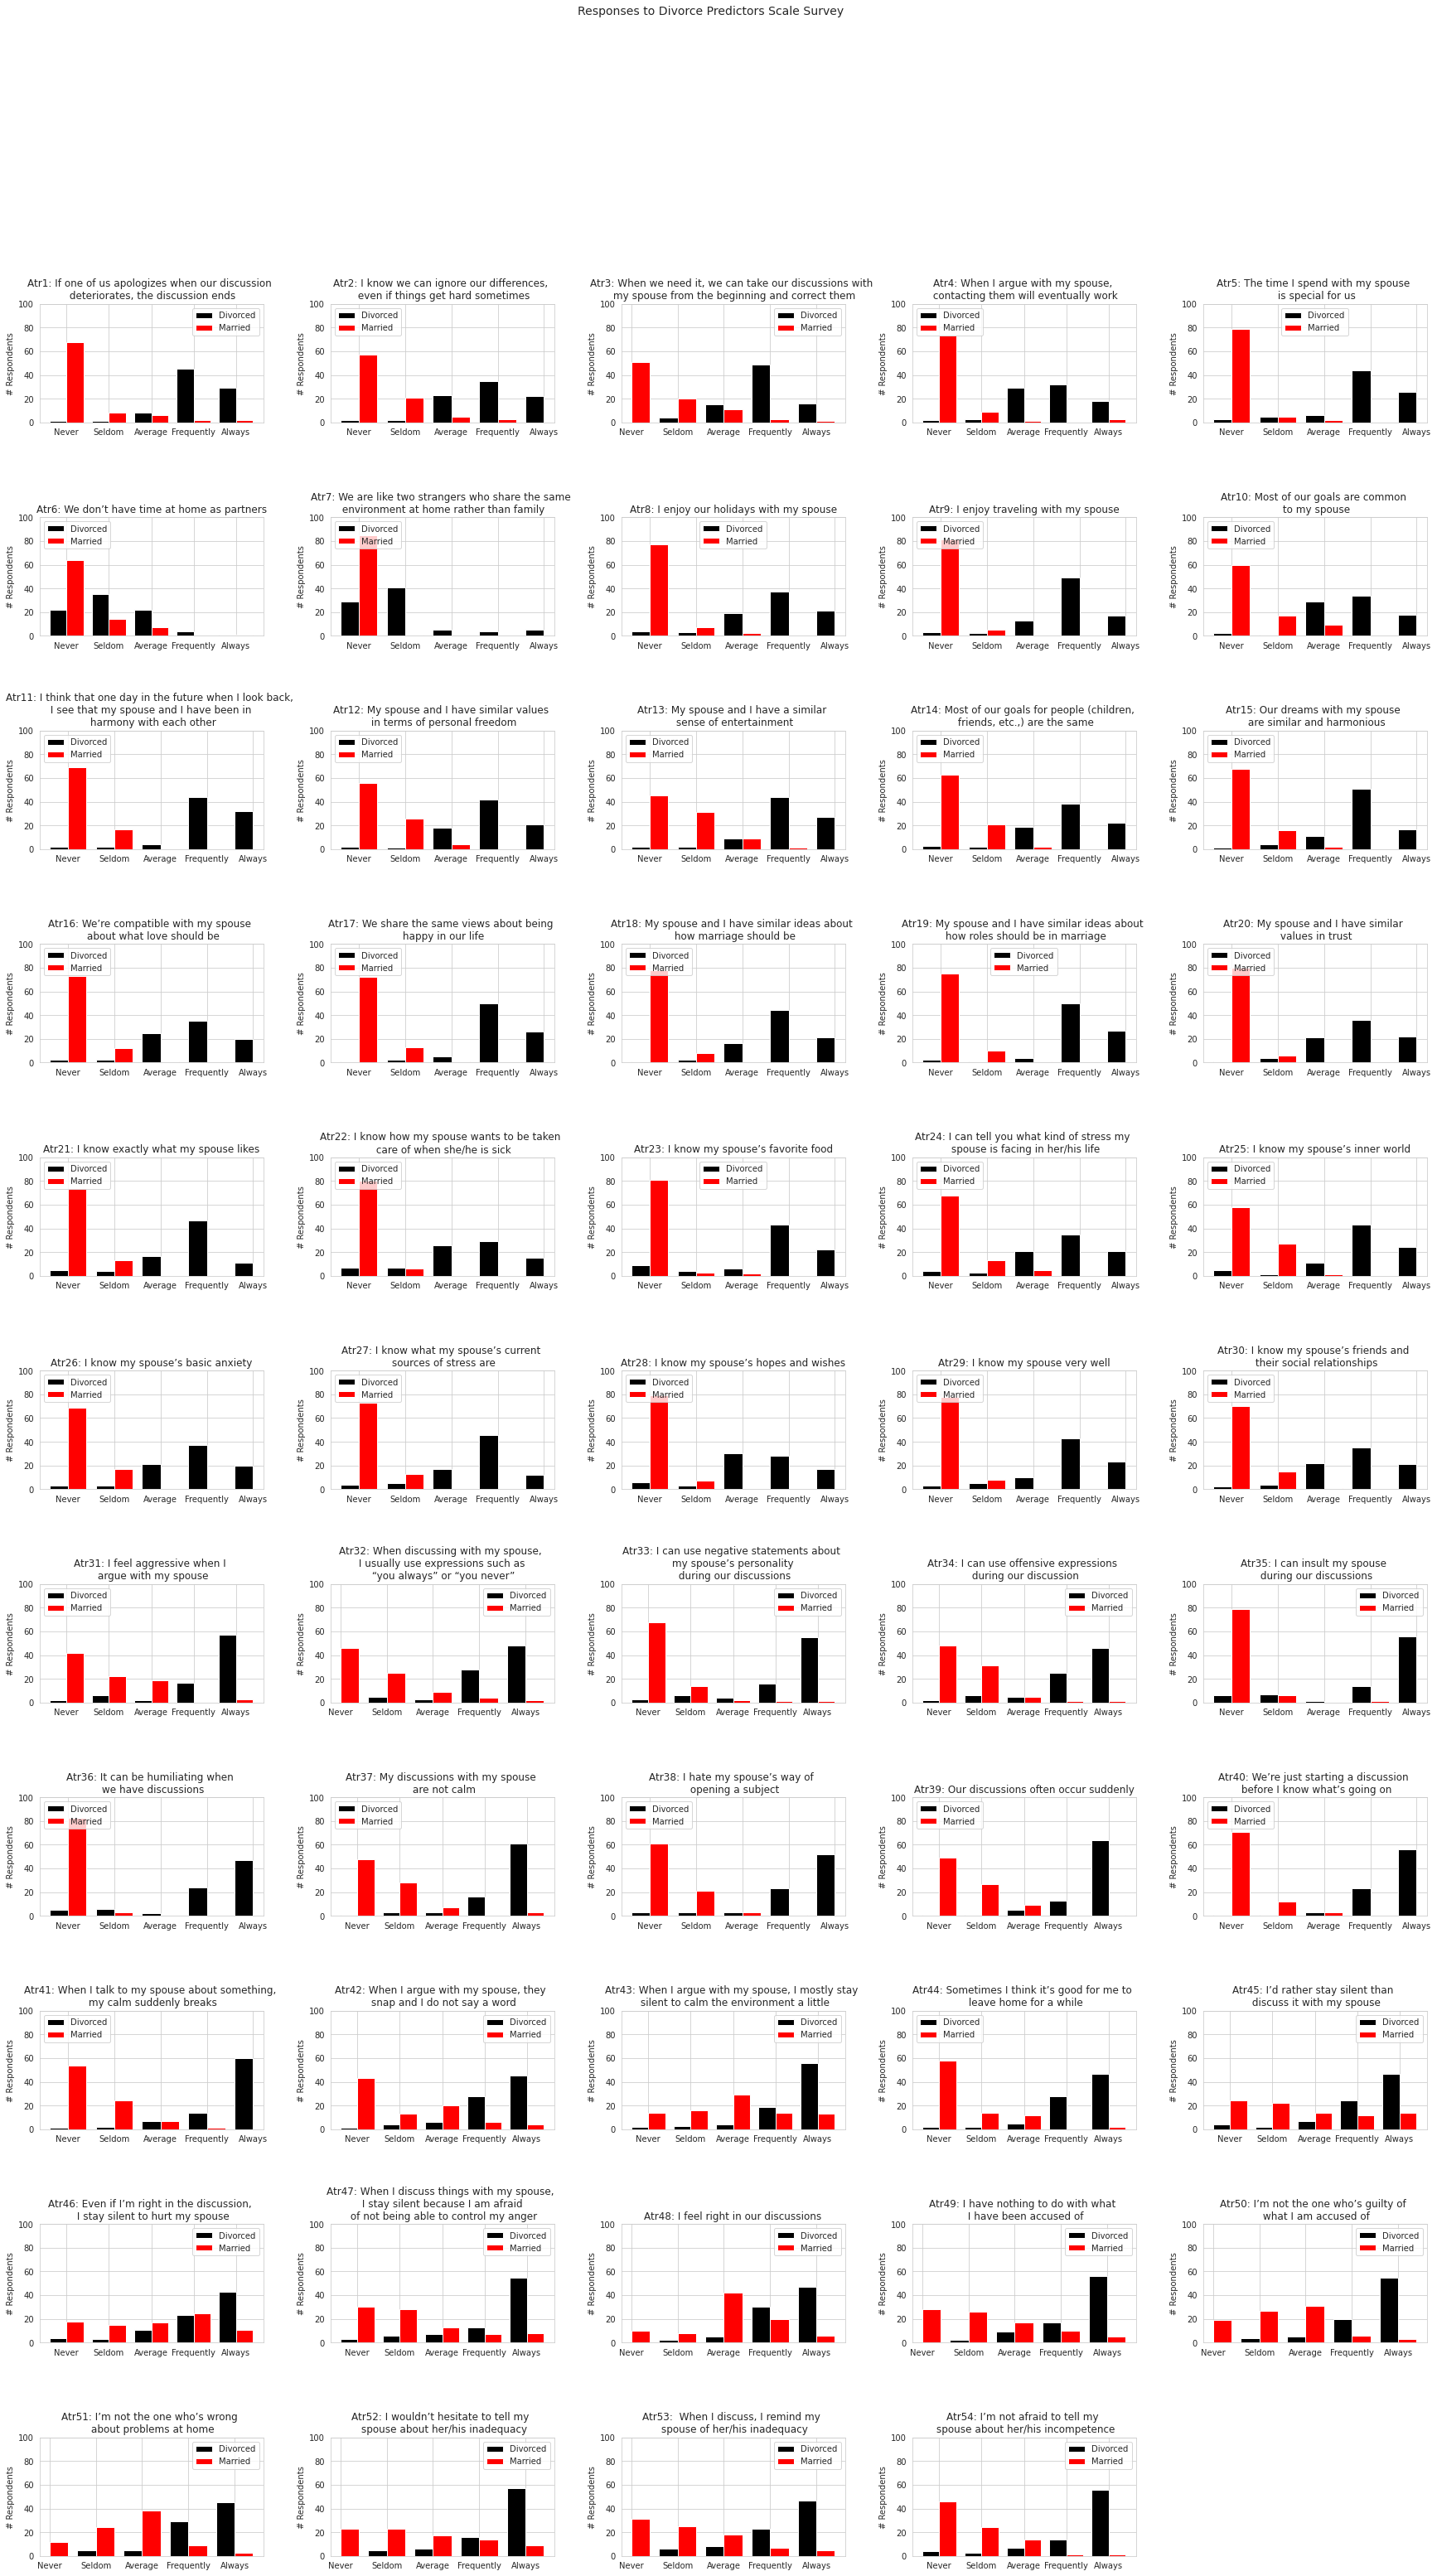

In [112]:
#create charts

fig = plt.figure(figsize = (30, 50))

for i, (df, title) in enumerate(zip(pivot_dfs, titles), start = 1):
    ax = plt.subplot(11, 5, i)
    
    #determine number of bars
    num_bars = 5
    
    #determine how bars will be arranged along x axis
    x_ticks = np.arange(num_bars)
    
    #space between bars
    width = 0.4
    
    bar_1 = ax.bar(x_ticks, df['Divorced'], width, color = 'black')
    bar_2 = ax.bar(x_ticks + width, df['Married'], width, color = 'red')
    
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    ax.set_ylim(0, 100)
    
    ax.set_xticks(x_ticks + width / 2)
    ax.set_xticklabels(df.iloc[:,0], rotation = None, fontsize = 10)
    ax.set_ylabel('# Respondents', fontsize = 10)
    ax.legend((bar_1, bar_2), ('Divorced', 'Married'), loc = 'best')
    
    plt.subplots_adjust(hspace = 0.8, wspace = 0.3)
    
    #set global heading for charts
    plt.suptitle('Responses to Divorce Predictors Scale Survey', fontsize = 14)
    
    ax.set_title(title, fontsize = 12)

plt.show()

# Feature Correlation

In [113]:
#we will convert the values in the table to strings so we can then apply pd.get_dummies and look at the 
#correlation
response_map = {0: 'Never', 1: 'Seldom', 2: 'Average', 3: 'Frequently', 4: 'Always'}

#use the questions dataframe created above to apply the mapping
data_labelled = questions.applymap(response_map.get)

#add class column back
data_labelled['Class'] = data['Class']

#convert to dummies
data_dummy = pd.get_dummies(data_labelled)

#find correlations
correlations = data_dummy.corr()['Class'].drop('Class')

#get top and bottom 20 questions/answers for chart
top_twenty = correlations.sort_values(ascending = False).head(20)
bottom_twenty = correlations.sort_values(ascending = False).tail(20)

#combine the dataframes
top_bottom = pd.concat([top_twenty, bottom_twenty]).sort_values(ascending = False)

### The questions most correlated with divorce are when couples respond 'Always' to the following:
- Our discussions often occur suddenly
- When I talk to my spouse about something, my calm suddenly breaks
- My discussions with my spouse are not calm
- I can insult my spouse during our discussions
- We're just starting a discussion before I know what's going on

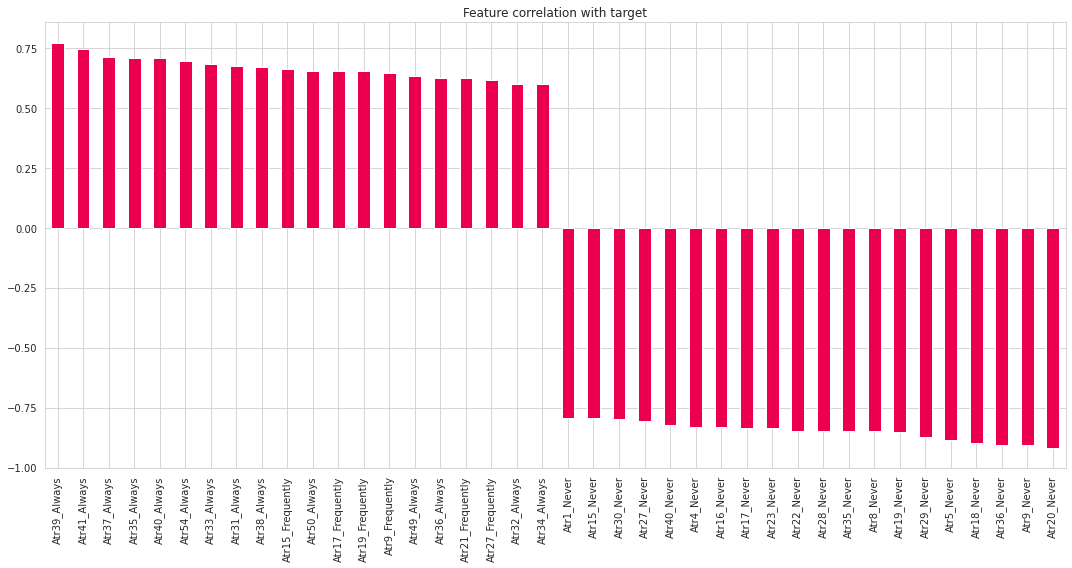

In [114]:
#plot correlation between target and all other features
fig = plt.figure(figsize = (15, 8))
top_bottom.plot(kind = 'bar', color = '#EB0050')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Feature correlation with target')
plt.tight_layout()

# Train Test Split

In [115]:
#define variables
X = data.drop('Class', axis = 1)
y = data['Class']

In [116]:
#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = data['Class'], random_state = 42)

In [117]:
#check size of each dataset
print('X train shape: ', X_train.shape)
print('y train shape: ', y_train.shape)
print('X test shape: ', X_test.shape)
print('y test shape: ', y_test.shape)

X train shape:  (119, 54)
y train shape:  (119,)
X test shape:  (51, 54)
y test shape:  (51,)


In [118]:
#checking counts for 0s and 1s
count_class_0, count_class_1 = y_train.value_counts()
print('Count class 0: ', count_class_0)
print('Count class 1: ', count_class_1)

Count class 0:  60
Count class 1:  59


# Model Training

In [119]:
#apply scaler for logistic regression
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Confusion matrix: Logistic Regression 

 [[26  0]
 [ 2 23]]


Classification report: Logistic Regression 

               precision    recall  f1-score   support

           0       0.93      1.00      0.96        26
           1       1.00      0.92      0.96        25

    accuracy                           0.96        51
   macro avg       0.96      0.96      0.96        51
weighted avg       0.96      0.96      0.96        51

AUC for Logistic Regression: 0.99692


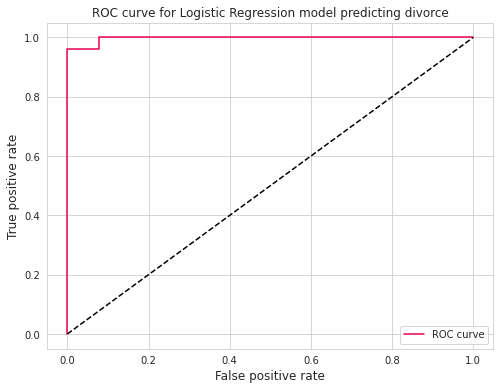



Confusion matrix: Random Forest 

 [[26  0]
 [ 2 23]]


Classification report: Random Forest 

               precision    recall  f1-score   support

           0       0.93      1.00      0.96        26
           1       1.00      0.92      0.96        25

    accuracy                           0.96        51
   macro avg       0.96      0.96      0.96        51
weighted avg       0.96      0.96      0.96        51

AUC for Random Forest: 0.99231


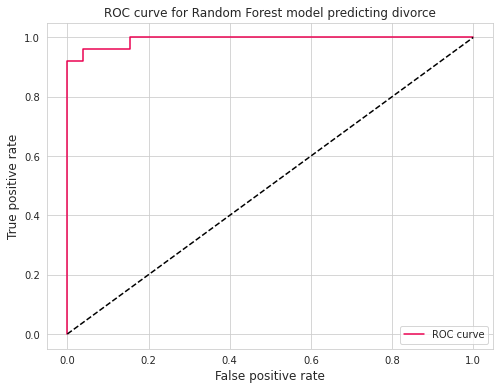



Confusion matrix: XGBoost 

 [[26  0]
 [ 2 23]]


Classification report: XGBoost 

               precision    recall  f1-score   support

           0       0.93      1.00      0.96        26
           1       1.00      0.92      0.96        25

    accuracy                           0.96        51
   macro avg       0.96      0.96      0.96        51
weighted avg       0.96      0.96      0.96        51

AUC for XGBoost: 0.99692


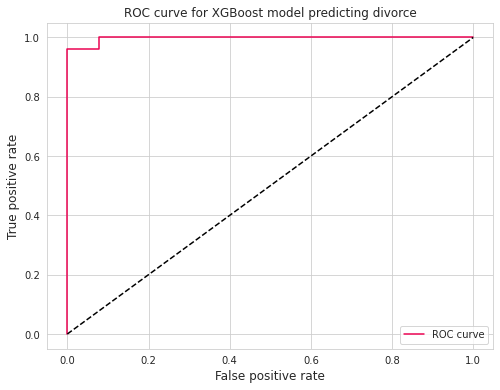

In [120]:
#loop iterates over each model, fits the data, creates predictions and outputs the results

model_list = [LogisticRegression(random_state = 42), RandomForestClassifier(random_state = 42), 
              XGBClassifier(random_state = 42, use_label_encoder = False, eval_metric = 'logloss')]

model_name = ['Logistic Regression', 'Random Forest', 'XGBoost']

#dict to store trained models
fitted_models = {}

for model, name in zip(model_list, model_name):
    
    #select scaled or unscaled data
    if name == 'Logistic Regression':
        X_tr, X_te = X_train_scaled, X_test_scaled
    else:
        X_tr, X_te = X_train, X_test
    
    #fit the model
    model.fit(X_tr, y_train)
    
    #save fitted model
    fitted_models[name] = model  
    
    #create predictions
    model_preds = model.predict(X_te)
    
    #create confusion matrix
    matrix = confusion_matrix(y_test, model_preds)
    
    #print confusion matrix and classification report
    print('\n')
    
    #'\033[1m' prints in bold font
    print('\033[1m' + 'Confusion matrix:', name, '\n\n', matrix)
    
    print('\n')
    
    #print classification report
    print('\033[1m' + 'Classification report:', name, '\n\n', metrics.classification_report(y_test, model_preds))
   
    #calculating probability scores to feed into the model
    prob = model.predict_proba(X_te)

    #keeping probabilities for class 1 outcome only (i.e. divorce)
    prob_positive = prob[:, 1]

    #calculate false positive rate (fpr), true positive rate (tpr) and thresholds
    model_fpr, model_tpr, model_thresholds =  roc_curve(y_test, prob_positive)    
    
    #calculating the AUC (area under curve) - this gives a single numeric metric to evaluate the model
    #an AUC value of 1 would represent a perfect classifier. If AUC = 0.5, the classifier only has 50% precision
    model_auc = auc(model_fpr, model_tpr)
    print('\033[1m' + 'AUC for ' + name + '\033[1m' + ':', round(model_auc, 5))
    
    #plotting an ROC (receiver operator characteristic) curve to evaluate the model performance visually - it illustrates 
    #the true positve rate against the false positve rate of the classifier. Best performing models will have an ROC curve 
    #that hugs the upper left corner of the graph. This would represent that we correctly classify the positive class more 
    #often than we incorrectly classify it. Smaller values on the x-axis of the plot indicate lower false positives and 
    #higher true negatives. Larger values on the y-axis of the plot indicate higher true positives and lower false negatives.

    fig = plt.figure(figsize = (8, 6))
    ax = plt.subplot()
    plt.plot(model_fpr, model_tpr, label = 'ROC curve', color = '#EB0050')

    #plotting the diagonal line from zero which represents a model that guesses incorrectly for every correct guess
    plt.plot([0, 1], [0, 1], color = 'black', linestyle = 'dashed')


    plt.legend(loc = 'best')
    #ax.patch.set_alpha(0.0)
    plt.xlabel('False positive rate', fontsize = 12)
    plt.ylabel('True positive rate', fontsize = 12)
    plt.title('ROC curve for ' + name + ' model predicting divorce', fontsize = 12)
    plt.show()
            

# Feature Importance

In [121]:
#find feature importance for XG Boost model

feature_names = X_train.columns

xgb_model = fitted_models['XGBoost']

feature_importance_xgb = pd.Series(xgb_model.feature_importances_, index = feature_names)
feature_importance_xgb.sort_values(ascending = False, inplace = True)

In [122]:
#find feature importance for Random Forest model

rf_model = fitted_models['Random Forest']

feature_importance_rf = pd.Series(xgb_model.feature_importances_, index = feature_names)
feature_importance_rf.sort_values(ascending = False, inplace = True)

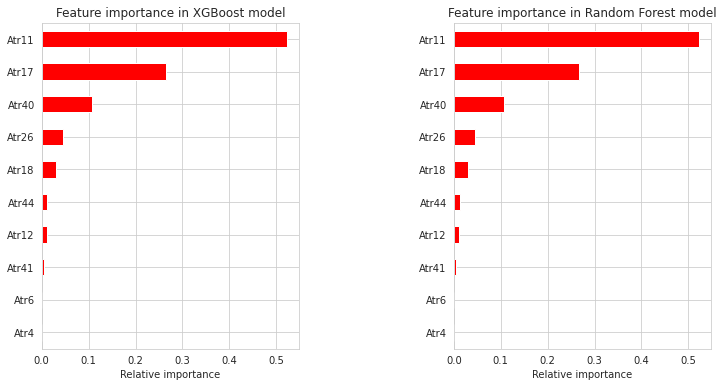

In [123]:
#plotting feature importance
plt.figure(figsize = (12, 6))

ax = plt.subplot(1, 2, 1)
feature_importance_xgb.nlargest(10).plot(kind = 'barh', color = 'red').invert_yaxis()
plt.xlabel('Relative importance')
plt.title('Feature importance in XGBoost model')

ax = plt.subplot(1, 2, 2)
feature_importance_rf.nlargest(10).plot(kind = 'barh', color = 'red').invert_yaxis()
plt.xlabel('Relative importance')
plt.title('Feature importance in Random Forest model')

plt.subplots_adjust(wspace = 0.6)


Both models identified the same questions as most predictive of divorce. These are:

- Atr11: I think that one day in the future when I look back, I see that my spouse and I have been in harmony with each other
- Atr17: We share the same views about being happy in our life
- Atr40: We’re just starting a discussion before I know what’s going on
- Atr26: I know my spouse’s basic anxiety
- Atr18: My spouse and I have similar ideas about how marriage should be

# Conclusion

Given that the survey questions used for this analysis were designed to predict divorce, the model predictions were almost perfect. The Logistic Regression and XG Boost models performed equally well in terms of precision, recall and AUC scores.

The feature importance analysis was identical for both the XG Boost and Random Forest models which indicates model stability and not random noise.

The questions in the survey that are most predictive of divorce tend to lean positive which may seem surpising but can be explained by the fact that couples heading for divorce are less likely to endorse strong positives in the survey. Happy, stable couples strongly agree with positive intimacy statements whereas unhappy or soon to divorce couples disagree or stay neutral, so the signal comes from absence of postive agreement rather than explicit negativity.

Taking each question in turn:

**Atr11: I think that one day in the future when I look back, I see that my spouse and I have been in harmony with each other**

- Future projection of harmony is a strong predictor of long term success. Divorcing couples fail to imagine a harmonious future.

**Atr17: We share the same views about being happy in our life**

- This taps into Shared Meaning, one of the most powerful Gottman predictors of relationship longevity.

**Atr40: We’re just starting a discussion before I know what’s going on**

- Whilst poorly worded, this question basically translates as 'Disagreements escalate quickly before I even understand what’s happening'. It measures conflict diffusion which is a huge predcitor of divorce as outlined by the Gottmans' Four Horsemen.

**Atr26: I know my spouse’s basic anxiety**

- This means a spouse understands the inner world of their partner. It's predictive because emotional attunement makes a couple more resilient.

**Atr18: My spouse and I have similar ideas about how marriage should be**

- This is foundational alignment. Couples who disagree on marriage expectations (roles, duties, communication style) statistically divorce far more often.


We have seen that the questions most predictive of divorce capture deep, structural relationship truths, not superficial behaviours. In other words, couples destined to divorce score low on future harmony, shared values, emotional awareness and stable communication.